In [1]:
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

Using TensorFlow backend.


In [3]:
filenames = os.listdir("cats_and_dogs_filtered/train/")
categories = []
for filename in filenames:
    category = filename.split(".")[0]
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    "filename": filenames,
    "category": categories
})

In [4]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [5]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [6]:
df.shape

(25000, 2)

1    12500
0    12500
Name: category, dtype: int64


<AxesSubplot:>

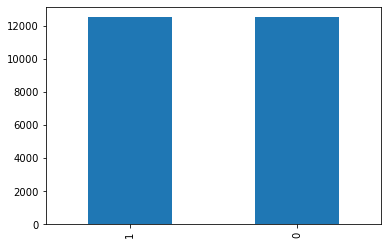

In [7]:
print(df["category"].value_counts())
df["category"].value_counts().plot(kind="bar")

In [8]:
%matplotlib inline

import cv2
import random
import matplotlib.pyplot as plt

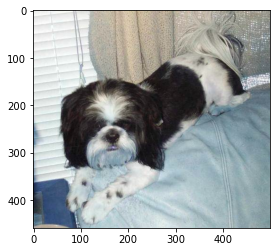

In [9]:
sample_img = random.choice(filenames)
img = cv2.imread("cats_and_dogs_filtered/train/" + sample_img)
plt.imshow(img)

## Create Model

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

## Model Compile

In [15]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [16]:
df["category"] = df["category"].replace({0:"cat",1:"dog"})

In [17]:
df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [18]:
df.tail()

,filename,category
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_df, validation_df = train_test_split(df,test_size=0.20,random_state=42)

In [21]:
print(train_df.shape)
print(validation_df.shape)

(20000, 2)
(5000, 2)


In [22]:
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [23]:
train_df.head(2)

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog


In [24]:
validation_df.head()

,filename,category
0,cat.493.jpg,cat
1,dog.9112.jpg,dog
2,cat.745.jpg,cat
3,dog.11022.jpg,dog
4,dog.11363.jpg,dog


In [25]:
total_train = train_df.shape[0]
total_validation = validation_df.shape[0]
batch_size = 20

In [26]:
print(total_train)
print(total_validation)

20000
5000


In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                   "cats_and_dogs_filtered/train/",
                                                   x_col="filename",
                                                   y_col="category",
                                                   class_mode="binary",
                                                   batch_size=batch_size,
                                                   target_size=(150,150))

Found 20000 validated image filenames belonging to 2 classes.


In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validation_df,
                                                             "cats_and_dogs_filtered/train/",
                                                             x_col="filename",
                                                             y_col="category",
                                                             class_mode="binary",
                                                             batch_size=batch_size,
                                                             target_size=(150,150))

Found 5000 validated image filenames belonging to 2 classes.


## Fit the model

In [29]:
history = model.fit(train_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   verbose=2,
                   validation_data=validation_generator,
                   validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 59s - loss: 0.7553 - accuracy: 0.5210 - val_loss: 0.6909 - val_accuracy: 0.5070
Epoch 2/15
100/100 - 54s - loss: 0.6970 - accuracy: 0.5360 - val_loss: 0.6805 - val_accuracy: 0.5950
Epoch 3/15
100/100 - 56s - loss: 0.7053 - accuracy: 0.5550 - val_loss: 0.6715 - val_accuracy: 0.6350
Epoch 4/15
100/100 - 63s - loss: 0.6863 - accuracy: 0.5815 - val_loss: 0.7844 - val_accuracy: 0.4920
Epoch 5/15
100/100 - 55s - loss: 0.6726 - accuracy: 0.5915 - val_loss: 0.6957 - val_accuracy: 0.5340
Epoch 6/15
100/100 - 66s - loss: 0.6654 - accuracy: 0.5915 - val_loss: 0.6271 - val_accuracy: 0.6330
Epoch 7/15
100/100 - 68s - loss: 0.6612 - accuracy: 0.6265 - val_loss: 0.6343 - val_accuracy: 0.6280
Epoch 8/15
100/100 - 65s - loss: 0.6446 - accuracy: 0.6350 - val_loss: 0.6330 - val_accuracy: 0.6620
Epoch 9/15
100/100 - 52s - loss: 0.6579 - accuracy: 0.6295 - val_loss: 0.6676 - val_accuracy: 0.641

In [36]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs,acc,"r","Training Accuracy")
plt.plot(epochs,val_acc,"b","Validation Accuracy")
plt.title("Training And Validation Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs,loss,"r","Training Loss")
plt.plot(epochs,val_loss,"b","Validation Loss")
plt.title("Training And Validation Loss")

plt.legend()
plt.show()

KeyError: 'acc'

In [ ]:
history.history.